##  Example of how to use Sonobat Guano MD to create tables ready for statistical analysis (Occupancy Modeling)


#### Between the content that is stored in the Guano MD and the content in the NABat file naming convention, nearly all the info we need is at hand.

In [1]:
from guano import GuanoFile

import pandas as pd
import numpy as np

from pathlib import Path

In [39]:
dname = r"F:\CO_NABat\CO 2017 acoustic"
d = Path(dname)
wavs = d.glob('**\*.wav')

output_dname = r"Z:\TSH\DD274_NABat\CNHP_data_processing\Derived\2017_output"
output_dname = r"F:\CO_NABat\2017_output"
out_dir = Path(output_dname)

if not out_dir.exists():
    out_dir.mkdir()

In [3]:
%%time

rows = []
mds = []

problems = []

for wav in wavs:
    try:
        g = GuanoFile(str(wav))
        md = dict(g.items())
        md['filepath'] = wav.parent
        md['filename'] = wav.name
        md['seconds'] = g.wav_params.nframes / g.wav_params.framerate
        mds.append(md)
    except: 
        print(str(wav))
        problems.append(str(wav))


F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_052717.wav
F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_052730.wav
F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_052741.wav
F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_202106.wav
F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_202322.wav
F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_202348.wav
F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_202414.wav
F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_202659.wav
F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_203120.wav
F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_203221.wav
F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_203431.wav
F:\CO_NABat\CO 2017 acoustic\157\SE\Noise Files\NABAT-157-SE_20170821_203607.wav
F:\CO_NABat\CO 2017 acoustic

### This gives us a dataframe of the Guano MD in that folder

In [4]:
df = pd.DataFrame(mds).set_index('Timestamp')
df.columns = [col.replace('|', '_').replace(' ', '_') for col in df.columns]
df['Species_Manual_ID'][df.Species_Manual_ID==''] = 'Not Vetted'
df['Species_Manual_ID'] = df['Species_Manual_ID'].str.upper()
df['Species_Auto_ID'] = df['Species_Auto_ID'].str.upper()
df.head(10)

C:\Anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,GUANO_Version,Length,Note,SB_Classifier,SB_Filter_HP,SB_Region,SB_Species_Auto_ID,SB_Version,Samplerate,Species_Auto_ID,Species_Manual_ID,TE,filename,filepath,seconds
Timestamp,,,,,,,,,,,,,,,
2017-08-10 20:19:29,1.0,0.0,,south Great Basin,0,Great Basin,noID,4.2.1,192000.0,NOID,NOT VETTED,1.0,NABAT-1005NE__0__20170810_201929.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667
2017-08-10 20:32:40,1.0,5.0,,south Great Basin,5,Great Basin,noID,4.2.1,192000.0,NOID,UNCONFIRMED,1.0,NABAT-1005NE__0__20170810_203240.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667
2017-08-10 20:32:47,1.0,5.0,,south Great Basin,5,Great Basin,HiF,4.2.1,192000.0,HIF,UNCONFIRMED,1.0,NABAT-1005NE__0__20170810_203247.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667
2017-08-10 20:35:14,1.0,5.0,,south Great Basin,5,Great Basin,Mylu,4.2.1,192000.0,MYLU,MYLU,1.0,NABAT-1005NE__0__20170810_203514.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667
2017-08-10 20:36:56,1.0,0.0,,south Great Basin,0,Great Basin,noID,4.2.1,192000.0,NOID,NOT VETTED,1.0,NABAT-1005NE__0__20170810_203656.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,3.706667
2017-08-10 20:42:52,1.0,5.0,,south Great Basin,5,Great Basin,HiF,4.2.1,192000.0,HIF,UNCONFIRMED,1.0,NABAT-1005NE__0__20170810_204252.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667
2017-08-10 20:45:50,1.0,0.0,,south Great Basin,0,Great Basin,noID,4.2.1,192000.0,NOID,NOT VETTED,1.0,NABAT-1005NE__0__20170810_204550.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,2.004000
2017-08-10 20:55:03,1.0,5.0,,south Great Basin,30,Great Basin,noID,4.2.1,192000.0,NOID,MYEV,1.0,NABAT-1005NE__0__20170810_205503.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667
2017-08-10 22:09:25,1.0,0.0,,south Great Basin,0,Great Basin,noID,4.2.1,192000.0,NOID,NOT VETTED,1.0,NABAT-1005NE__0__20170810_220925.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,3.145333


In [5]:
df.Species_Manual_ID.unique()

array(['NOT VETTED', 'UNCONFIRMED', 'MYLU', 'MYEV', 'MYCI', 'LACI',
       'TABR', nan, 'LANO', 'MYTH', 'EPFU', 'ANPA', 'MYVO', 'LABO',
       'NYMA', 'MYCA', 'EUMA', 'MYYU', 'YES', 'UNIDENTIFIED', 'PAHE',
       'COTO', 'LABL', 'HIF', 'LOF', 'NOISE'], dtype=object)

In [6]:
vetted = df[~df.Species_Manual_ID.isin(['NOT VETTED', 'UNCONFIRMED', 'NOISE', 'UNIDENTIFIED', 'YES', 'HIF', 'LOF', 'NOID'])].dropna(subset=['Species_Manual_ID'])
vetted = vetted[~vetted.Species_Auto_ID.isin(['HIF', 'LOF', 'NOID'])].dropna(subset=['Species_Auto_ID'])

vetted.head()

,GUANO_Version,Length,Note,SB_Classifier,SB_Filter_HP,SB_Region,SB_Species_Auto_ID,SB_Version,Samplerate,Species_Auto_ID,Species_Manual_ID,TE,filename,filepath,seconds
Timestamp,,,,,,,,,,,,,,,
2017-08-10 20:35:14,1.0,5.0,,south Great Basin,5,Great Basin,Mylu,4.2.1,192000.0,MYLU,MYLU,1.0,NABAT-1005NE__0__20170810_203514.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667
2017-08-11 22:59:24,1.0,4.4,,south Great Basin,5,Great Basin,Tabr,4.2.1,192000.0,TABR,TABR,1.0,NABAT-1005NE__0__20170811_225924.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.449333
2017-08-12 00:14:59,1.0,5.0,,south Great Basin,5,Great Basin,Tabr,4.2.1,192000.0,TABR,TABR,1.0,NABAT-1005NE__0__20170812_001459.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667
2017-08-12 22:09:12,1.0,5.0,,south Great Basin,5,Great Basin,Myci,4.2.1,192000.0,MYCI,MYCI,1.0,NABAT-1005NE__0__20170812_220912.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667
2017-08-13 21:08:59,1.0,5.0,,south Great Basin,5,Great Basin,Myci,4.2.1,192000.0,MYCI,MYCI,1.0,NABAT-1005NE__0__20170813_210859.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667


## A quick plot of the classification results

##### The code to plot a confusion matrix was pulled from [a user contributed Kaggle notebook], and is hidden in the cell below.
[a user contributed Kaggle notebook]: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

In [7]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Manual vs Auto ID',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure()
    
    mcm = np.ma.MaskedArray(cm)
    mcm.mask = cm==0

    plt.imshow(mcm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "darkslategray")


    plt.tight_layout()
    plt.ylabel('Manual Species label')
    plt.xlabel('Auto Species label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

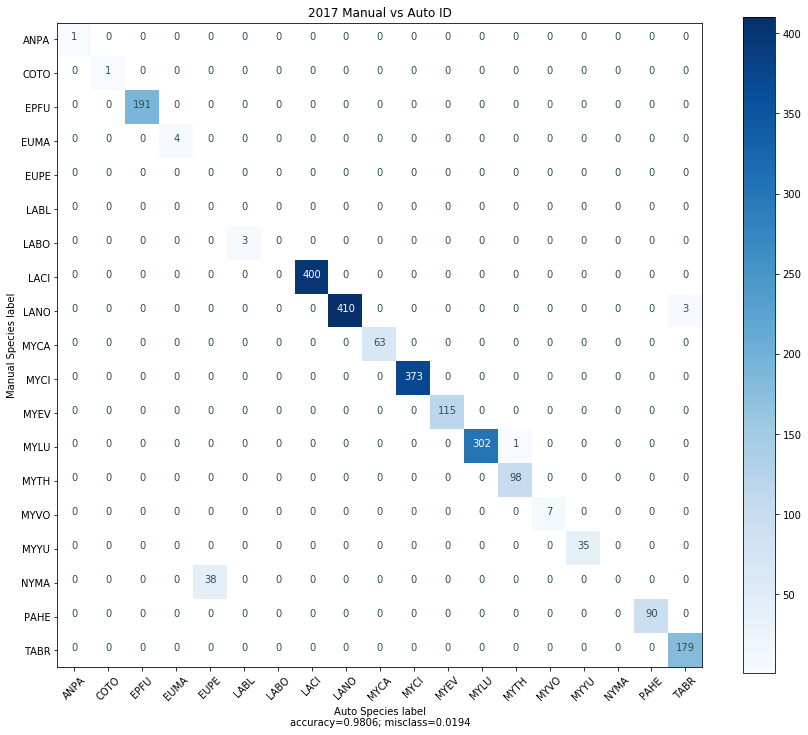

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(vetted.Species_Manual_ID, vetted.Species_Auto_ID)

target_names = np.unique(vetted[['Species_Manual_ID', 'Species_Auto_ID']].values)
np.set_printoptions(precision=2)
plot_confusion_matrix(cm, target_names=target_names, normalize=False, title='2017 Manual vs Auto ID')


In [9]:
df.Species_Manual_ID.unique(), df.Species_Auto_ID.fillna('').unique()

(array(['NOT VETTED', 'UNCONFIRMED', 'MYLU', 'MYEV', 'MYCI', 'LACI',
        'TABR', nan, 'LANO', 'MYTH', 'EPFU', 'ANPA', 'MYVO', 'LABO',
        'NYMA', 'MYCA', 'EUMA', 'MYYU', 'YES', 'UNIDENTIFIED', 'PAHE',
        'COTO', 'LABL', 'HIF', 'LOF', 'NOISE'], dtype=object),
 array(['NOID', 'HIF', 'MYLU', 'LOF', 'MYCI', 'TABR', '', 'LANO', 'LACI',
        'MYVO', 'MYEV', 'ANPA', 'MYCA', 'EPFU', 'PAHE', 'LABL', 'MYTH',
        'HILO', 'MYYU', 'EUPE', 'EUMA', 'COTO'], dtype=object))

## Now let's convert this dataframe to the formats needed for this NABat occupancy analysis

#### A couple of helper functions we'll need...

In [10]:
from datetime import datetime, timedelta

def monitoring_night(dt):
    # return the sample night from a date time
    # if after midnight return previous date
    if dt.hour < 12:
        monitoringnight = dt.date() - timedelta(days=1)
    else:
        monitoringnight = dt.date()
        
    return monitoringnight
    

def parse_nabat_fname(fname):
    try:
        """If a file is in the format specified by NABat (grtsid_sitename_date_time.wav)
        parse it and return the components.  

        Allows for some discrepansies an malformations
        """
        fname = fname.replace('-', '_')
        fname = fname.replace('__0__', '_')
        fname = fname.replace('__1__', '_')
        fname = fname.replace('_0+1_', '_')
        fname = fname.replace('__', '_')

        f = Path(fname)
        name = f.stem
        if name.lower().startswith('nabat'):
            name = name[5:]
        if name.startswith('_'):
            name = name [1:]
        if name.startswith('Q'):
            name = name [1:]

        digit = name[0]
        grtsid = ''
        while digit.isnumeric():
            name = name [1:]
            grtsid += digit
            digit = name[0]

        if name.startswith('_'):
            name = name [1:]

        sitename, datestr, timestr = name.split('_')
        if len(timestr) > 6:
            print(f"problem time: {timestr}, {fname}")
            timestr = "000000"
        dt = datetime.strptime('T'.join([datestr, timestr]), "%Y%m%dT%H%M%S")


        return(grtsid, sitename, dt, monitoring_night(dt))
    except:
        print(fname, name, grtsid, timestr)
        raise Exception

#### Add in columns for cell, site, filedatetime, and monitoring night based on the file names.

In [11]:

df['GridCellID'], df['SiteID'], df['filedatetime'], df['monitoringnight'] = zip(*df.filename.apply(parse_nabat_fname))
df["GridCellID"] = df.GridCellID.astype(int)
df.head(4)

,GUANO_Version,Length,Note,SB_Classifier,SB_Filter_HP,SB_Region,SB_Species_Auto_ID,SB_Version,Samplerate,Species_Auto_ID,Species_Manual_ID,TE,filename,filepath,seconds,GridCellID,SiteID,filedatetime,monitoringnight
Timestamp,,,,,,,,,,,,,,,,,,,
2017-08-10 20:19:29,1.0,0.0,,south Great Basin,0,Great Basin,noID,4.2.1,192000.0,NOID,NOT VETTED,1.0,NABAT-1005NE__0__20170810_201929.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667,1005,NE,2017-08-10 20:19:29,2017-08-10
2017-08-10 20:32:40,1.0,5.0,,south Great Basin,5,Great Basin,noID,4.2.1,192000.0,NOID,UNCONFIRMED,1.0,NABAT-1005NE__0__20170810_203240.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667,1005,NE,2017-08-10 20:32:40,2017-08-10
2017-08-10 20:32:47,1.0,5.0,,south Great Basin,5,Great Basin,HiF,4.2.1,192000.0,HIF,UNCONFIRMED,1.0,NABAT-1005NE__0__20170810_203247.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667,1005,NE,2017-08-10 20:32:47,2017-08-10
2017-08-10 20:35:14,1.0,5.0,,south Great Basin,5,Great Basin,Mylu,4.2.1,192000.0,MYLU,MYLU,1.0,NABAT-1005NE__0__20170810_203514.wav,F:\CO_NABat\CO 2017 acoustic\1005\NE,4.998667,1005,NE,2017-08-10 20:35:14,2017-08-10


In [12]:
df[df.GridCellID==2]['Species_Manual_ID'].unique()

array(['NOT VETTED', nan], dtype=object)

### Table 1.  Sonobat auto ID output

In [ ]:
auto = df.groupby(['GridCellID', 'SiteID', 'monitoringnight'])['Species_Auto_ID'].value_counts()
auto  = auto.reset_index(name='Species_Auto_ID_count', level=-1)
auto.Species_Auto_ID = auto.Species_Auto_ID.replace('', '_blank')
auto_id_counts = auto.pivot(columns='Species_Auto_ID').replace(np.nan, '0')
# auto_id_counts.to_csv(out_dir.joinpath("CNHP_AutoIDResults_2017.csv"))
auto_id_counts

### Table 2 Sonobat auto id output joined to manually vetted classifications (Truth)

In [15]:
vetted = df[~df.Species_Manual_ID.isin(['NOT VETTED', 'UNCONFIRMED', 'NOISE', 'UNIDENTIFIED', 'YES', 'HIF', 'LOF', 'NOID'])].dropna(subset=['Species_Manual_ID'])
vetted = vetted[~vetted.Species_Auto_ID.isin(['HIF', 'LOF', 'NOID'])].dropna(subset=['Species_Auto_ID'])

In [ ]:
auto_ = vetted.groupby(['GridCellID', 'SiteID', 'monitoringnight', 'Species_Manual_ID'])['Species_Auto_ID'].value_counts()
auto_  = auto_.reset_index(name='Species_Auto_ID_count', level=-1)
auto_.Species_Auto_ID = auto_.Species_Auto_ID.replace('', '_blank')
auto_id_counts_ = auto_.pivot(columns='Species_Auto_ID').replace(np.nan, '0')

manual = vetted.groupby(['GridCellID', 'SiteID', 'monitoringnight'])['Species_Manual_ID'].value_counts()
manual  = manual.reset_index(name='Species_Manual_ID_count', level=-1)
manual.Species_Manual_ID = manual.Species_Manual_ID.replace('', '_blank')

manual = manual.set_index(['Species_Manual_ID'], append=True)
manual
table2 = pd.concat([manual, auto_id_counts_], axis=1)
table2.columns = ['Species_Manual_ID_count']  + list(auto_id_counts_.columns.get_level_values(1))
# table2.to_csv(out_dir.joinpath("CNHP_ManualIDResults_2017.csv"))
table2

In [18]:
df[['GridCellID', 'SiteID', 'filedatetime', 'monitoringnight']].to_csv(out_dir.joinpath("2017_survey_nights.csv"), index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Z:\\TSH\\DD274_NABat\\CNHP_data_processing\\Derived\\2017_output\\2017_survey_nights.csv'

## Create a map of the auto id results

In [27]:
import nabatpy
colorado = nabatpy.get_grts_data(grid_frame='Conus', state="Colorado")

colorado = colorado.set_index('GRTS_ID', drop=False)
colorado_point = colorado.copy()
colorado_point['geometry'] = colorado.geometry.centroid
colorado.head()

,CONUS_10KM,GRTS_ID,cnty_n_1,cnty_n_2,cnty_n_3,cnty_n_4,cnty_n_5,cnty_p_1,cnty_p_2,cnty_p_3,...,own_USFS,state_n_1,state_n_2,state_n_3,state_n_4,state_p_1,state_p_2,state_p_3,state_p_4,water_p
GRTS_ID,,,,,,,,,,,,,,,,,,,,,
2,74208,2,Colorado_Mesa,NA,NA,NA,NA,100.000000,0.000000,0.00000,...,0.000000,Colorado,NA,NA,NA,100.000000,0.000000,0.00000,0.0,0.034166
61,65909,61,Colorado_Pueblo,NA,NA,NA,NA,100.000000,0.000000,0.00000,...,0.000000,Colorado,NA,NA,NA,100.000000,0.000000,0.00000,0.0,0.019721
82,78428,82,Colorado_Phillips,Colorado_Logan,NA,NA,NA,60.630693,39.369307,0.00000,...,0.000000,Colorado,NA,NA,NA,100.000000,0.000000,0.00000,0.0,0.008068
114,59911,114,Kansas_Morton,Colorado_Baca,Oklahoma_Texas,Oklahoma_Cimarron,NA,85.021658,8.437391,4.90595,...,62.324001,Kansas,Colorado,Oklahoma,NA,85.021658,8.437391,6.54095,0.0,0.004496
125,61749,125,Colorado_Las Animas,NA,NA,NA,NA,100.000000,0.000000,0.00000,...,1.756847,Colorado,NA,NA,NA,100.000000,0.000000,0.00000,0.0,0.000000


In [28]:
autoid_by_grts = auto_id_counts.astype(int).groupby(level=[0]).sum()

if autoid_by_grts.index[0] == '':
    autoid_by_grts = autoid_by_grts.iloc[1:, :]

flat_cols = list(autoid_by_grts.columns.get_level_values(1))
# flat_cols = ['GridCellID'] + flat_cols[1:]
autoid_by_grts.columns = flat_cols

for col in ['NOID', "HIF", "LOF", "HILO"]:
    flat_cols.pop(flat_cols.index(col))
    flat_cols.append(col)

autoid_by_grts = autoid_by_grts[flat_cols].reset_index()
# autoid_by_grts = autoid_by_grts.reindex(df.GridCellID)
# autoid_by_grts = autoid_by_grts.sort_index()
autoid_by_grts['GridCellID'] = autoid_by_grts.GridCellID.astype(int)
autoid_by_grts.head()

,GridCellID,ANPA,COTO,EPFU,EUMA,EUPE,LABL,LACI,LANO,MYCA,...,MYLU,MYTH,MYVO,MYYU,PAHE,TABR,NOID,HIF,LOF,HILO
0,2,7,0,59,3,85,0,111,11,55,...,6,11,10,2,175,45,1866,343,115,0
1,61,1,0,4,0,0,0,1,0,7,...,0,0,0,0,0,6,335,65,2,0
2,82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,19,0,0,0
3,157,2,0,4,1,2,1,13,35,7,...,220,8,8,0,0,191,7580,937,101,7
4,221,0,0,7,0,0,0,1,2,1,...,1,0,0,0,3,1,209,27,8,0


In [29]:
colorado_auto = colorado_point.merge(autoid_by_grts, how='right', left_on='GRTS_ID', right_on='GridCellID')
colorado_auto.head()

C:\Anaconda3\envs\pyviz\lib\site-packages\geopandas\geodataframe.py:475: FutureWarning: 'GRTS_ID' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  result = DataFrame.merge(self, *args, **kwargs)


,CONUS_10KM,GRTS_ID,cnty_n_1,cnty_n_2,cnty_n_3,cnty_n_4,cnty_n_5,cnty_p_1,cnty_p_2,cnty_p_3,...,MYLU,MYTH,MYVO,MYYU,PAHE,TABR,NOID,HIF,LOF,HILO
0,74208.0,2.0,Colorado_Mesa,NA,NA,NA,NA,100.000000,0.000000,0.000000,...,6,11,10,2,175,45,1866,343,115,0
1,65909.0,61.0,Colorado_Pueblo,NA,NA,NA,NA,100.000000,0.000000,0.000000,...,0,0,0,0,0,6,335,65,2,0
2,78428.0,82.0,Colorado_Phillips,Colorado_Logan,NA,NA,NA,60.630693,39.369307,0.000000,...,0,0,0,0,0,0,19,0,0,0
3,66801.0,157.0,Colorado_Dolores,Colorado_San Miguel,NA,NA,NA,54.128191,45.871809,0.000000,...,220,8,8,0,0,191,7580,937,101,7
4,65406.0,221.0,Utah_San Juan,Colorado_Dolores,Colorado_Montezuma,NA,NA,53.035965,40.166830,6.797205,...,1,0,0,0,3,1,209,27,8,0


In [30]:
import geopandas as gpd
counties = gpd.read_file(r"C:\Users\talbertc\Downloads\cb_2017_us_county_5m\cb_2017_us_county_5m.shp")

ANPA


NameError: name 'colo_point' is not defined

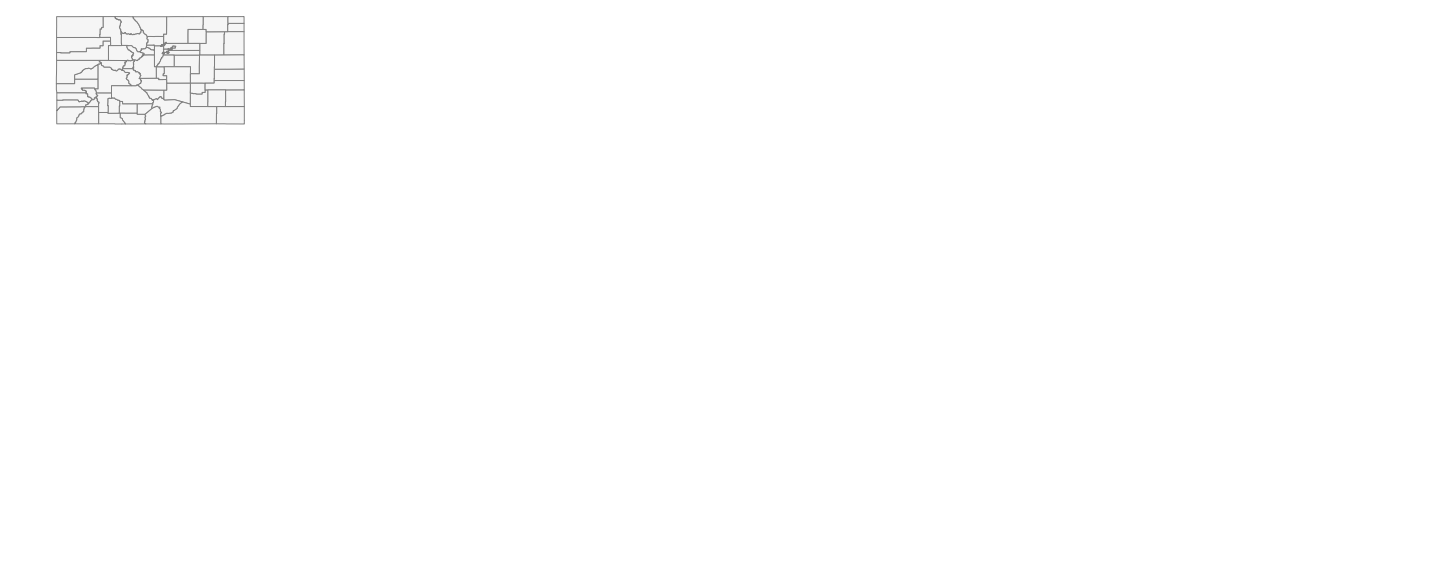

In [32]:
fig, ax = plt.subplots(4, 5, figsize=(25, 10))

vmin = 0
vmax = 100

for ax_ in ax.flatten():
    ax_.set_axis_off()

for i, species in enumerate(colorado_auto.columns[-21:-4]):
    print(species)
    counties[counties.STATEFP=='08'].plot(ax=ax.flatten()[i], color='whitesmoke', edgecolor='grey')
    colo_point.plot(column=species, 
                     legend=False, 
                     cmap=plt.cm.viridis_r, 
                     ax=ax.flatten()[i],
                     vmin=vmin, vmax=vmax,
                     markersize=25)
    ax.flatten()[i].set_title(species)
    ax.flatten()[i].set_axis_off()
    
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis_r, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
fig.subplots_adjust(bottom=0.01, right=0.8, top=0.9, hspace=0.1)
cbar_ax = fig.add_axes([0.8, 0.3, 0.015, 0.5])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Number of Auto-Detections")
ticks = cbar.ax.get_yticklabels()
ticks[-1] = f"{vmax}+"
cbar.ax.set_yticklabels(ticks);


fig.suptitle = "CNHP 2016 Autodetection Results"



ANPA
COTO
EPFU
EUMA
EUPE
LABL
LACI
LANO
MYCA
MYCI
MYEV
MYLU
MYTH
MYVO
MYYU
PAHE
TABR


Text(0.5,0.98,'CNHP 2017 Auto-detections')

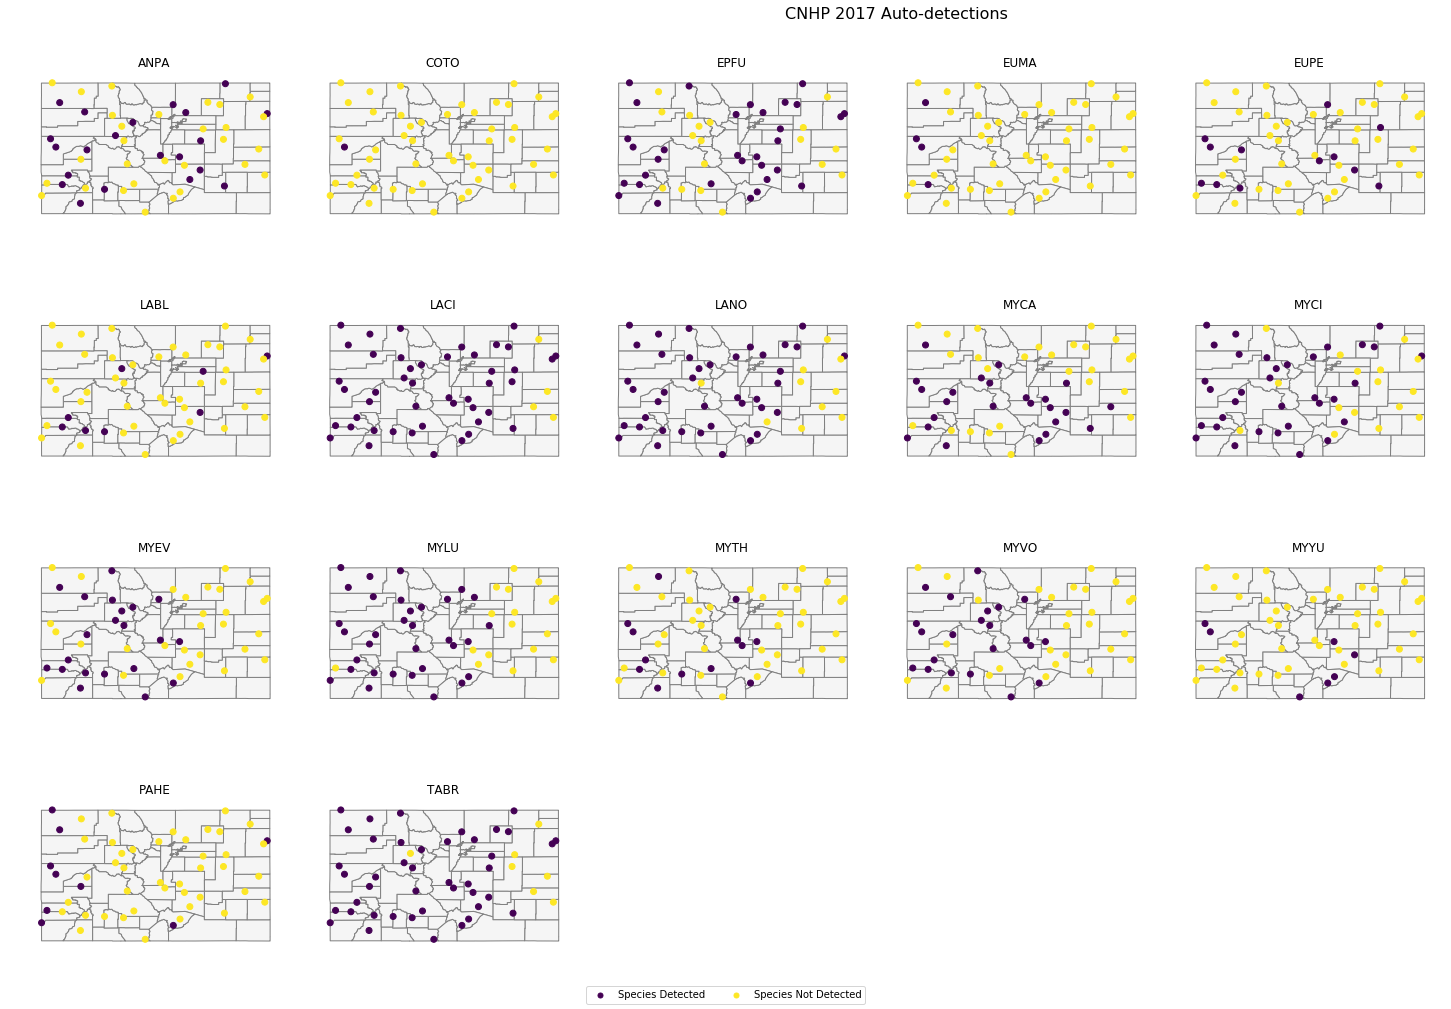

In [38]:
fig, ax = plt.subplots(4, 5, figsize=(25, 14))

for ax_ in ax.flatten():
    ax_.set_axis_off()

for i, species in enumerate(colorado_auto.columns[-21:-4]):
    if species != 'NAN':
        print(species)
        counties[counties.STATEFP=='08'].plot(ax=ax.flatten()[i], color='whitesmoke', edgecolor='grey')
        
        species_data = colorado_auto[[species, 'geometry']].fillna(0)
        species_data['present'] = species_data[species]>0
        result = species_data.plot(categorical=True, column='present', cmap=plt.cm.viridis_r, ax=ax.flatten()[i])
        
        ax.flatten()[i].set_title(species)
        
plt.tight_layout()
fig.subplots_adjust(bottom=0.01, right=0.8, top=0.95, hspace=0.1)   
import matplotlib.lines as mlines
pres = mlines.Line2D([], [], color=plt.cm.viridis_r(1.0), marker='.', linestyle='None',
                          markersize=10, label='Species Detected')
absent = mlines.Line2D([], [], color=plt.cm.viridis_r(0.0), marker='.', linestyle='None',
                          markersize=10, label='Species Not Detected')

plt.figlegend(handles=[pres, absent], loc='lower center', ncol=2)
fig.suptitle('CNHP 2017 Auto-detections', fontsize=16)



In [ ]:
colorado_auto

In [ ]:
df

In [41]:
df.to_csv(out_dir.joinpath("raw_data.csv"))